In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
(X_train , y_train),(X_test , y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

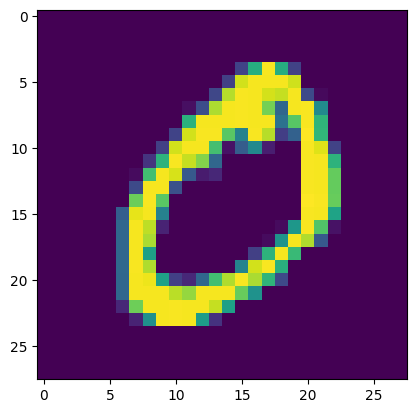

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])


In [ ]:
X_train = X_train/255
X_test = X_test/255

**ANN NEAURAL NETWORK LAYER**

In [ ]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([0])

In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN: add channel dimension (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


**CNN NEURAL NETWORK LAYER**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
]

history = model.fit(X_train, y_train, epochs=25, validation_split=0.2, callbacks=callbacks)


Epoch 1/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3300 - loss: 1.8081

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.3302 - loss: 1.8077 - val_accuracy: 0.8709 - val_loss: 0.4432
Epoch 2/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8145 - loss: 0.5883

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.8145 - loss: 0.5883 - val_accuracy: 0.8977 - val_loss: 0.3262
Epoch 3/25
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8540 - loss: 0.4701

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.8540 - loss: 0.4700 - val_accuracy: 0.9205 - val_loss: 0.2571
Epoch 4/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8804 - loss: 0.3944

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.8804 - loss: 0.3944 - val_accuracy: 0.9381 - val_loss: 0.1954
Epoch 5/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8998 - loss: 0.3306

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.8998 - loss: 0.3306 - val_accuracy: 0.9478 - val_loss: 0.1614
Epoch 6/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9207 - loss: 0.2680

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - accuracy: 0.9207 - loss: 0.2680 - val_accuracy: 0.9556 - val_loss: 0.1356
Epoch 7/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9282 - loss: 0.2406

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9282 - loss: 0.2406 - val_accuracy: 0.9615 - val_loss: 0.1180
Epoch 8/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9402 - loss: 0.2056

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9402 - loss: 0.2056 - val_accuracy: 0.9654 - val_loss: 0.1081
Epoch 9/25
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9458 - loss: 0.1805

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9458 - loss: 0.1805 - val_accuracy: 0.9704 - val_loss: 0.0935
Epoch 10/25
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9480 - loss: 0.1737

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9480 - loss: 0.1737 - val_accuracy: 0.9695 - val_loss: 0.0922
Epoch 11/25
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9509 - loss: 0.1616

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9509 - loss: 0.1616 - val_accuracy: 0.9718 - val_loss: 0.0839
Epoch 12/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9533 - loss: 0.1522

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9533 - loss: 0.1522 - val_accuracy: 0.9734 - val_loss: 0.0807
Epoch 13/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9576 - loss: 0.1453

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9576 - loss: 0.1453 - val_accuracy: 0.9765 - val_loss: 0.0718
Epoch 14/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9596 - loss: 0.1302

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9596 - loss: 0.1302 - val_accuracy: 0.9772 - val_loss: 0.0686
Epoch 15/25
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9636 - loss: 0.1199

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9636 - loss: 0.1199 - val_accuracy: 0.9777 - val_loss: 0.0677
Epoch 16/25
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9615 - loss: 0.1245

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9615 - loss: 0.1245 - val_accuracy: 0.9796 - val_loss: 0.0635
Epoch 17/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9661 - loss: 0.1137 - val_accuracy: 0.9778 - val_loss: 0.0646
Epoch 18/25
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9659 - loss: 0.1143

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9659 - loss: 0.1143 - val_accuracy: 0.9808 - val_loss: 0.0612
Epoch 19/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.9675 - loss: 0.1025 - val_accuracy: 0.9796 - val_loss: 0.0630
Epoch 20/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9708 - loss: 0.0955

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9708 - loss: 0.0955 - val_accuracy: 0.9795 - val_loss: 0.0607
Epoch 21/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9692 - loss: 0.1020 - val_accuracy: 0.9800 - val_loss: 0.0665
Epoch 22/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9705 - loss: 0.0935

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9705 - loss: 0.0935 - val_accuracy: 0.9817 - val_loss: 0.0577
Epoch 23/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9718 - loss: 0.0905 - val_accuracy: 0.9819 - val_loss: 0.0599
Epoch 24/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9707 - loss: 0.0942 - val_accuracy: 0.9810 - val_loss: 0.0605
Epoch 25/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9724 - loss: 0.0920

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9724 - loss: 0.0920 - val_accuracy: 0.9814 - val_loss: 0.0576


In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

model = load_model('best_cnn_model.h5')

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Test Accuracy: 0.9830


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


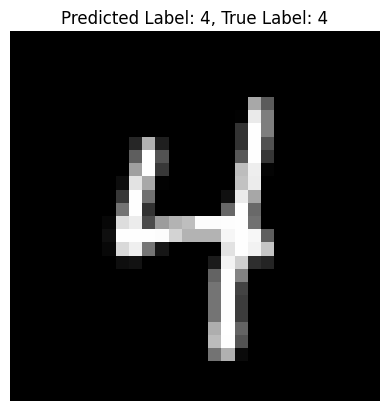

In [ ]:
idx = 19
image = X_test[idx].reshape(1, 28, 28, 1)
predicted_label = model.predict(image).argmax(axis=1)[0]

plt.imshow(X_test[idx], cmap='gray')
plt.title(f"Predicted Label: {predicted_label}, True Label: {y_test[idx]}")
plt.axis('off')
plt.show()



In [ ]:
model.save('best_cnn_model.h5')
